# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import statsmodels.api as sm
import seaborn as sns

In [2]:
#%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [3]:
athletes = pd.read_csv("athletes.csv")

In [4]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [5]:
# Quantidade de entradas e variáveis
print("Entradas: \t {}".format(athletes.shape[0]))
print("Variáveis: \t {}".format(athletes.shape[1]))

Entradas: 	 11538
Variáveis: 	 11


In [6]:
# Colunas no dataset
athletes.columns

Index(['id', 'name', 'nationality', 'sex', 'dob', 'height', 'weight', 'sport',
       'gold', 'silver', 'bronze'],
      dtype='object')

In [7]:
# Primeiras 5 linhas do dataset
athletes.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [8]:
# Informações do dataset
athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11538 entries, 0 to 11537
Data columns (total 11 columns):
id             11538 non-null int64
name           11538 non-null object
nationality    11538 non-null object
sex            11538 non-null object
dob            11537 non-null object
height         11208 non-null float64
weight         10879 non-null float64
sport          11538 non-null object
gold           11538 non-null int64
silver         11538 non-null int64
bronze         11538 non-null int64
dtypes: float64(2), int64(4), object(5)
memory usage: 991.6+ KB


In [9]:
# Verifiando a existência de valores nulos
athletes.isna().sum()

id               0
name             0
nationality      0
sex              0
dob              1
height         330
weight         659
sport            0
gold             0
silver           0
bronze           0
dtype: int64

In [10]:
# Sua análise começa aqui.

# Amostras para Q1,Q2,Q3 e Q4

# Obtendo amostra da Altura 
height = get_sample(athletes,'height',3000)

# Obtendo amostra do Peso
weight = get_sample(athletes,'weight',3000)

# Aplicando transfomação logarítmica na variável weight
log_weight = np.log(weight)



In [11]:
# DF para Q5,Q6 e Q7

bra = pd.DataFrame(athletes.loc[athletes['nationality']=='BRA','height'])
usa = pd.DataFrame(athletes.loc[athletes['nationality']=='USA','height'])
can = pd.DataFrame(athletes.loc[athletes['nationality']=='CAN','height'])

## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).


### **Shapiro-Wilk**

O teste de Shapiro-Wilk é um teste de aderência à distribuição normal, que abreviamos para teste de normalidade. 

O objetivo do teste é verifcar se um determinado conjunto de dados possui distribuição normal.

Para isso temos:

A hipótese nula, $H_{0}$, é a normalidade dos dados.
        
- Se o valor-p for menor que o nível de significância $\alpha$, então temos evidências de que os dados não vêm de uma distribuição normal.
        
- Se o valor-p for maior que $\alpha$, então não podemos afimar que os dados não vêm de uma distribuição normal

O teste de Shapiro-Wilk é mais indicador para amostras menores, por causa da sua alta sensiblidade a pequenos desvios de normalidaes em amostras grande, por exemplo, A implementação do SciPy só suporta até 5000 observações.


No nosso caso temos:

- $H_{0}$ As alturas são normalmente distrbuídas
- $H_{1}$ As alturas não são normalmente distrbuídas

In [12]:
def q1():
    # Retorne aqui o resultado da questão 1.
   
    # Para podermos afirmar que a distribuição das alturas está normalmente distribuída, devemos ter um p-value maior que a significância de 5%.
    
    # Definindo o padrão de significância (alpha) em 5%
    alpha = 0.05
    
    # Testando a normalidade
    stat, p_value = sct.shapiro(height)
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))
    
    return p_value  > 0.05

q1()

stat = 0.9961519837379456
p-value = 5.681722541339695e-07


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

__Analisando o resultado__:

O resultado do teste Shapiro-Wilk apresenta um **p-value menor que 5% de significância** o que nos leva a **rejeitar** a hipótese nula de que as alturas são normalmentes distribuídas, porém ao plotarmos o histograma da variável height temos um distribuição normal, dessa forma podemos também utilzar do do qq-plot para validarmos no teste.

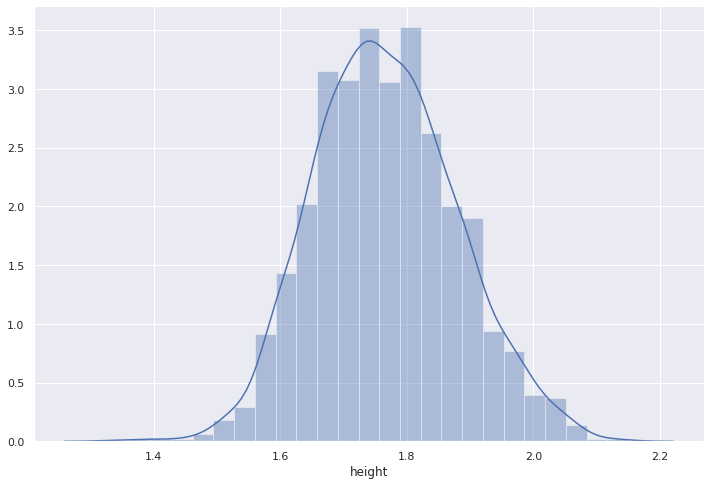

In [13]:
sns.distplot(height,bins=25);

Pelo QQ-Plot temos a reta vermeha que representa os quantis de uma distribuição normal teórica e os pontos representam os quantis da amostra testada e neste caso vemos que a maioria dos pontos estão sobre a reta, indicando que as alturas estão normalmente distribuídas.

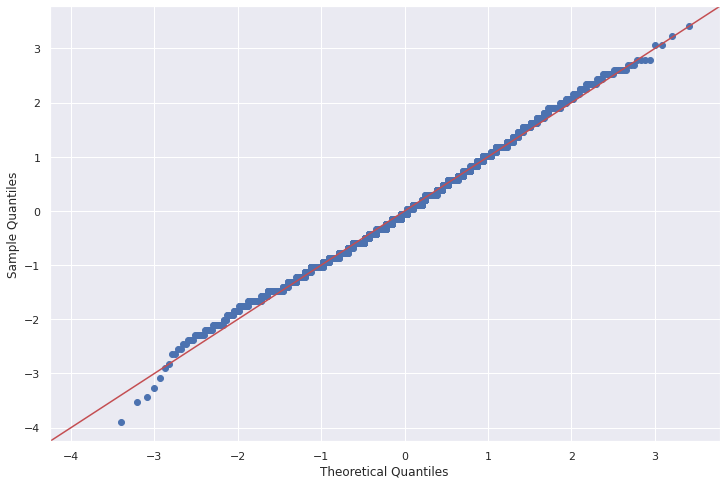

In [14]:
sm.qqplot(height, fit=True, line="45");

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

### Jarque-Bera

Assim como Shapiro-Wilk, o teste de Jarque-Bera é um teste de aderência à distribuição normal com $H_{0}$ sendo a normalidade dos dados. A diferença reside na estatística de teste utilizada.

A estatística de teste é baseada na assimetria (skewness) e curtose (kurtosis) excessiva da amostra. 

Se a amostra vem de uma distribuição normal, então esses valores devem ser muito próximos de zero.

In [15]:
def q2():
    # Retorne aqui o resultado da questão 2.
    
    # Para podermos afirmar que a distribuição das alturas está normalmente distribuída, devemos ter um p-value maior que a significância de 5%.
    
    # Definindo o padrão de significância (alpha) em 5%
    alpha = 0.05
    
    # Testando a normalidade
    stat, p_value = sct.jarque_bera(height)
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))
   
    return bool(p_value > alpha)

q2()

stat = 13.03363513594265
p-value = 0.001478366424594868


False

__Para refletir__:

* Esse resultado faz sentido?


__Analisando o resultado__:

Assim com no teste Shapiro-Wilk o **p-value possui significância menor que 5%**, o que nos leva a **rejeitar** a hipótese nula de que os dados estão normalmente distribuídos.

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).


### Teste de D'Agostino-Pearson

Assim como o teste Jarque-Bera este teste também se baseia na curtose e na assimetria para determinar se a distribuição de dados se afasta da distribuição normal.

A distribuição normal padrão tem curtose e assimetria igual a zero.


In [16]:
def q3():
    # Retorne aqui o resultado da questão 3.
       
    # Para podermos afirmar que a distribuição dos pesos está normalmente distribuída, devemos ter um p-value maior que a significância de 5%.
    
    # Definindo o padrão de significância (alpha) em 5%
    alpha = 0.05
    
    # Testando a normalidade
    stat, p_value = sct.normaltest(weight)
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))
    
    return  bool(p_value > alpha)

q3()

stat = 510.24655809881176
p-value = 1.5898922918029537e-111


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

__Analisando o resultado__:

O resultado do teste D'Agostino-Pearson apresenta um **p-value menor que 5% de significância** o que nos leva a **rejeitar** a hipótese nula de que os pesos são normalmentes distribuídas.

O resultado estatitísco (stat) também deu um valor distante de 0, que também inidica não ser uma distribuição normal.

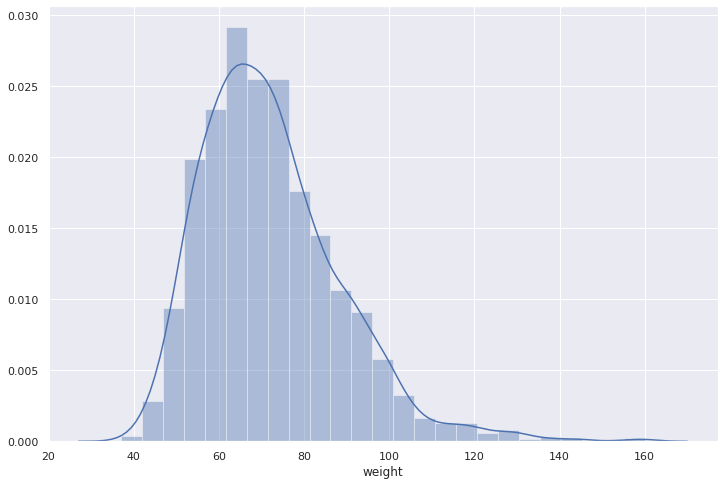

In [17]:
sns.distplot(weight,bins=25);

Com o histograma podemos perceber a assimetria no lado direto, onde o Skewness possui uma valor maior que zero.

In [18]:
print('Skewness = ',sct.skew(weight))

Skewness =  1.0319231165284939


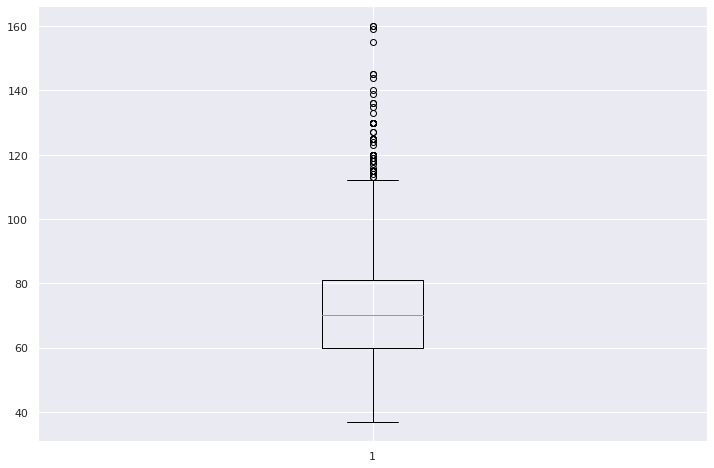

In [19]:
plt.boxplot(weight);

No boxplot vemos a prensença muitos *outliers* que também demonstram que os valores de *weight* não apresentam distribuição normal.

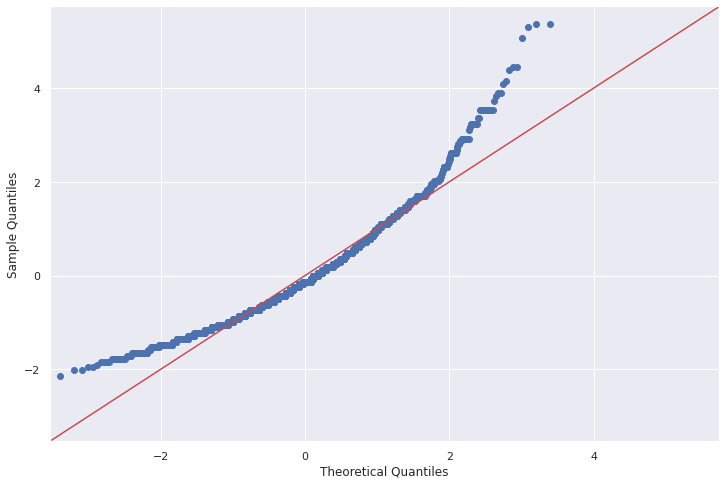

In [20]:
sm.qqplot(weight, fit=True, line="45");

Pelo QQ-Plot também vemos não se tratar de uma distribuição normal.

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [21]:
def q4():
    # Retorne aqui o resultado da questão 4.
       
    # Para podermos afirmar que a distribuição dos pesos está normalmente distribuída, devemos ter um p-value maior que a significância de 5%.
    
    # Definindo o padrão de significância (alpha) em 5%
    alpha = 0.05
    
    # Testando a normalidade
    stat, p_value = sct.normaltest( log_weight)
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))
    
    return  bool(p_value > alpha)

q4()

stat = 45.91534331977353
p-value = 1.0705572101256944e-10


False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

__Analisando o resultado__:

Como vimos anteriormente, a variável *weight* possui bastante *outliers* e a aplicação da transfomação logarítmica ajuda a suaviazar os impactos desses *outliers*, dessa forma percebemos que a distribuição tende a ficar mais parecida com uma distribuição normal.


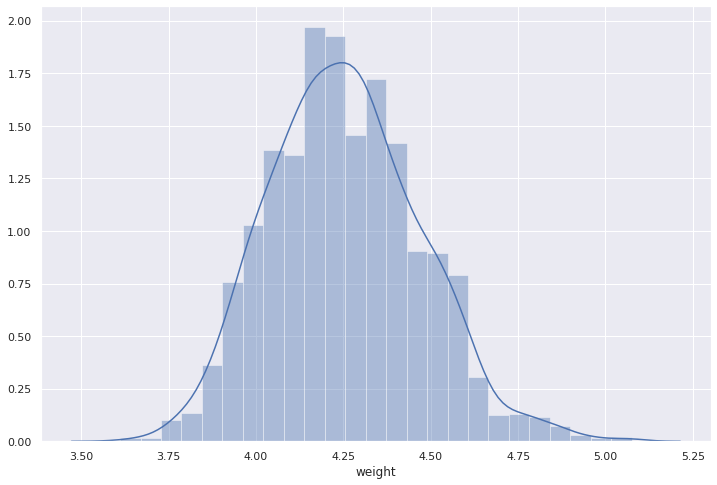

In [22]:
sns.distplot(log_weight,bins=25);

Ao calcularmos o Skewness vemos que o resultado ainda é maior que 0 indicando uma assimetria do lado direito.

In [23]:
print('Skewness = ',sct.skew(log_weight))

Skewness =  0.3054155670951046


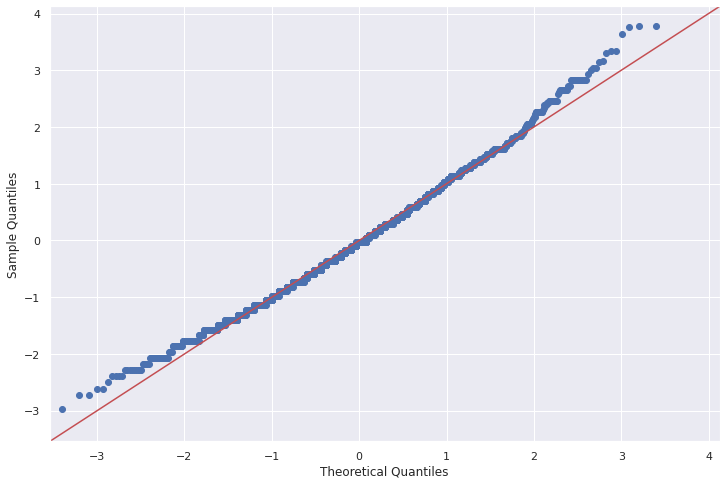

In [24]:
sm.qqplot(log_weight, fit=True, line="45");

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [25]:
def q5():
    # Retorne aqui o resultado da questão 5.
    
    # Definindo o padrão de significância (alpha) em 5%
    alpha = 0.05
    
    # Testando as médias
    stat, p_value = sct.ttest_ind(bra['height'],usa['height'],equal_var = False,nan_policy='omit')
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))

    return bool(p_value > alpha)
 
q5()

stat = -3.2232436467501855
p-value = 0.0013080041830140115


False

__Analisando o resultado__:

O p_value é menor 5% portanto não podemos afirmar que as médias das alturas dos atletas brasileiros são estatisticamente iguais.

## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [26]:
def q6():
    # Retorne aqui o resultado da questão 6.
    
    # Definindo o padrão de significância (alpha) em 5%
    alpha = 0.05
    
    # Testando as médias
    stat, p_value = sct.ttest_ind(bra['height'],can['height'],equal_var = False,nan_policy='omit')
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))

    return bool(p_value > alpha)
 
q6()

stat = 0.6389304914365109
p-value = 0.5230827295440921


True

__Analisando o resultado__:

O p_value é maior 5% portanto podemos afirmar que as médias das alturas dos atletas brasileiros são estatisticamente iguais.

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [27]:
def q7():
    # Retorne aqui o resultado da questão 7.
    
    
    # Testando as mẽdias
    stat, p_value = sct.ttest_ind(usa['height'],can['height'],equal_var = False,nan_policy='omit')
    
    # Exibindo valores medida estatítica e p-value
    print("stat = {}".format(stat))
    print("p-value = {}".format(p_value))

    return float(round(p_value,8))

q7()

stat = 3.516987632488539
p-value = 0.0004660129347389851


0.00046601

__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

__Analisando o resultado__:

In [28]:
print('Média da alutra dos atletadas dos EUA =',round(usa['height'].mean(),3) )
print('Média da alutra dos atletadas dos Canadá =',round(can['height'].mean(),3) )

Média da alutra dos atletadas dos EUA = 1.788
Média da alutra dos atletadas dos Canadá = 1.759


No teste entre as médias da altura dos atletas dos EUA e Canadá vimos que o p-value ficou abaixo de 5%, portanto temos evidências que as médias da altura não são iguais e obtendo isoladamente a média da altura dos atletas dos EUA temos o valor de 1,788 e para o Canadá 1,759 então o p-value faz sentindo.

No *t-test* temos como variável estatítica o *t-score*, dessa forma podemos encontrar na [tabela T-test](http://math.mit.edu/~vebrunel/Additional%20lecture%20notes/t%20(Student%27s)%20table.pdf) o *p-value* referente ao *t-score* obtido.